In [493]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [494]:
# read from Bereiter data 
# https://sparkbyexamples.com/pandas/pandas-read-excel-multiple-sheets-in-pandas/
bereiter_df = pd.read_excel('data\co2\grl52461-sup-0003-supplementary.xls', 
                            sheet_name='CO2 Composite')

# Create a subset of the DataFrame (selecting all rows starting from the 14th row and all columns)
ber_df = bereiter_df.iloc[13:]
# drop the index columns
# https://datagy.io/pandas-drop-index-column/
ber_df = ber_df.reset_index(drop=True)

# use first rows as an header 
# https://saturncloud.io/blog/how-to-set-column-headers-to-the-first-row-in-a-pandas-dataframe-a-comprehensive-guide/
ber_df.columns = ber_df.iloc[0]

# Drop the first row (header row) 
ber_df = ber_df.iloc[1:]

ber_df 


,Gasage (yr BP),CO2 (ppmv),sigma mean CO2 (ppmv)
1,-51.03,368.022488,0.060442
2,-48,361.780737,0.37
3,-46.279272,359.647793,0.098
4,-44.405642,357.10674,0.159923
5,-43.08,353.946685,0.043007
...,...,...,...
1897,803925.284376,202.921723,2.064488
1898,804009.870607,207.498645,0.915083
1899,804522.67463,204.861938,1.642851
1900,805132.442334,202.226839,0.689587


In [495]:
#change the datatype on flaot64 
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html
ber_df = ber_df.astype('float64')

# Remove leading and trailing spaces from column names
ber_df.columns = ber_df.columns.str.strip()

In [496]:
# add a new columns "Year" showing the corrent year.
# present is equal to 1950
ber_df['Year'] = 1950 - ber_df['Gasage (yr BP)'].astype(int)

In [497]:
ber_df

,Gasage (yr BP),CO2 (ppmv),sigma mean CO2 (ppmv),Year
1,-51.030000,368.022488,0.060442,2001
2,-48.000000,361.780737,0.370000,1998
3,-46.279272,359.647793,0.098000,1996
4,-44.405642,357.106740,0.159923,1994
5,-43.080000,353.946685,0.043007,1993
...,...,...,...,...
1897,803925.284376,202.921723,2.064488,-801975
1898,804009.870607,207.498645,0.915083,-802059
1899,804522.674630,204.861938,1.642851,-802572
1900,805132.442334,202.226839,0.689587,-803182


In [498]:
# reorder columns index 
#https://www.geeksforgeeks.org/how-to-move-a-column-to-first-position-in-pandas-dataframe/

first_column = ber_df.pop('Year') 
ber_df.insert(0, 'Year', first_column) 

# sort the value based on the year column 
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html

ber_df = ber_df.sort_values(by='Year', ascending=False)

In [499]:
# check for duplicate in the columns Gasage (yr BP)
# https://www.statology.org/pandas-find-duplicates/
duplicate_in_year = ber_df.duplicated(['Gasage (yr BP)'], keep=False)
print(ber_df[duplicate_in_year])


Empty DataFrame
Columns: [Year, Gasage (yr BP), CO2 (ppmv), sigma mean CO2 (ppmv)]
Index: []


In [500]:
# Checking missing values
# https://medium.com/analytics-vidhya/python-finding-missing-values-in-a-data-frame-3030aaf0e4fd
print("Missing Values")
print(ber_df.isnull().sum(), "\n")

# Checking data shape
# https://stackoverflow.com/questions/58008120/how-to-use-format-in-python-to-print-out-the-data-shape
print("Dataset Shape:")
print(f'Rows {ber_df.shape[0]}, Columns: {ber_df.shape[1]}')


Missing Values
0
Year                     0
Gasage (yr BP)           0
CO2 (ppmv)               0
sigma mean CO2 (ppmv)    0
dtype: int64 

Dataset Shape:
Rows 1901, Columns: 4


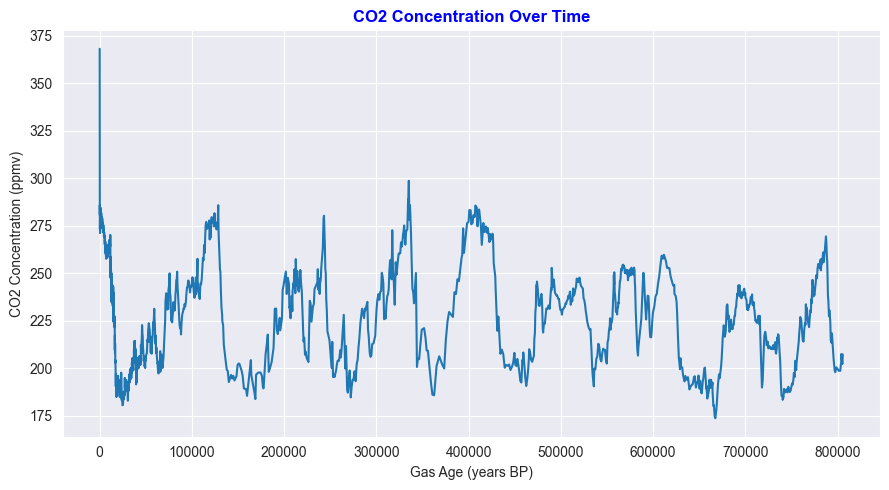

In [501]:
# plot the CO2 (ppmv) vs Gasage (yr BP)

# Set the style
sns.set_style("darkgrid")

# Set the size of the figure
plt.figure(figsize=(9, 5))

# Create the line plot
sns.lineplot(x='Gasage (yr BP)', y='CO2 (ppmv)', data=ber_df)

# Add labels and title
plt.xlabel('Gas Age (years BP)')
plt.ylabel('CO2 Concentration (ppmv)')
plt.title('CO2 Concentration Over Time', fontweight='bold', color='blue')

# Improve spacing
plt.tight_layout()

# Show the plot
plt.show()



In [502]:
# read from IPCC dataser
ipcc_data_co2 = pd.read_excel('data/co2/41586_2008_BFnature06949_MOESM31_ESM.xls', 
                            sheet_name='3.  Composite CO2')

# Create a subset of the DataFrame (selecting all rows starting from the 14th row and all columns)
ipcc_df_co2 = ipcc_data_co2.iloc[5:]

# drop the index columns
ipcc_df_co2 = ipcc_df_co2.reset_index(drop=True)

# use first rows as an header 
ipcc_df_co2.columns = ipcc_df_co2.iloc[0]

# Drop the first row (header row) 
ipcc_df_co2 = ipcc_df_co2.iloc[1:]

ipcc_df_co2

,EDC3_gas_a (yr),CO2 (ppmv)
1,137,280.4
2,268,274.9
3,279,277.9
4,395,279.1
5,404,281.9
...,...,...
1092,794608,199.4
1093,795202,195.2
1094,796467,189.3
1095,797099,188.4


In [503]:
#change the datatype on flaot64 
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html
ipcc_df_co2 = ipcc_df_co2.astype('float64')

# Remove leading and trailing spaces from column names
ipcc_df_co2.columns = ipcc_df_co2.columns.str.strip()

In [504]:
ipcc_df_co2

,EDC3_gas_a (yr),CO2 (ppmv)
1,137.0,280.4
2,268.0,274.9
3,279.0,277.9
4,395.0,279.1
5,404.0,281.9
...,...,...
1092,794608.0,199.4
1093,795202.0,195.2
1094,796467.0,189.3
1095,797099.0,188.4


In [505]:
# add a new columns "Year" showing the corrent year.
ipcc_df_co2['Year'] = 1950 - ipcc_df_co2['EDC3_gas_a (yr)'].astype(int)

# reorder columns index 
first_column = ipcc_df_co2.pop('Year') 
ipcc_df_co2.insert(0, 'Year', first_column) 

# sort the value based on the year column 
ipcc_df_co2 = ipcc_df_co2.sort_values(by='Year', ascending=False)
ipcc_df_co2

,Year,EDC3_gas_a (yr),CO2 (ppmv)
1,1813,137.0,280.4
2,1682,268.0,274.9
3,1671,279.0,277.9
4,1555,395.0,279.1
5,1546,404.0,281.9
...,...,...,...
1092,-792658,794608.0,199.4
1093,-793252,795202.0,195.2
1094,-794517,796467.0,189.3
1095,-795149,797099.0,188.4


In [506]:
ipcc_df_co2

,Year,EDC3_gas_a (yr),CO2 (ppmv)
1,1813,137.0,280.4
2,1682,268.0,274.9
3,1671,279.0,277.9
4,1555,395.0,279.1
5,1546,404.0,281.9
...,...,...,...
1092,-792658,794608.0,199.4
1093,-793252,795202.0,195.2
1094,-794517,796467.0,189.3
1095,-795149,797099.0,188.4


In [507]:
# check for duplicate in the columns Gasage (yr BP)
# https://www.statology.org/pandas-find-duplicates/
duplicate_in_year = ipcc_df_co2.duplicated(['EDC3_gas_a (yr)'], keep=False)
print("Duplicate Value")
print(ipcc_df_co2[duplicate_in_year])

Duplicate Value
0      Year  EDC3_gas_a (yr)  CO2 (ppmv)
532 -407433         409383.0       274.2
531 -407433         409383.0       275.2


In [508]:
#line 532 and 531 are duplicate
# groupby year, EDC3_gas_a (yr) and average the CO2 (ppmv) to remove the duplicate
ipcc_df_co2 = (
    ipcc_df_co2
    .groupby(['Year', 'EDC3_gas_a (yr)'])['CO2 (ppmv)']
    .mean()
    .reset_index()
    .sort_values(by='Year', ascending=False)
)

In [511]:
#reset the index
ipcc_df_co2 = ipcc_df_co2.reset_index(drop=True)

In [513]:
# Checking missing values
# https://medium.com/analytics-vidhya/python-finding-missing-values-in-a-data-frame-3030aaf0e4fd
print("Missing Values")
print(ipcc_df_co2.isnull().sum(), "\n")

# Checking data shape
# https://stackoverflow.com/questions/58008120/how-to-use-format-in-python-to-print-out-the-data-shape
print("Dataset Shape:")
print(f'Rows {ipcc_df_co2.shape[0]}, Columns: {ipcc_df_co2.shape[1]}')

Missing Values
Year               0
EDC3_gas_a (yr)    0
CO2 (ppmv)         0
dtype: int64 

Dataset Shape:
Rows 1095, Columns: 3


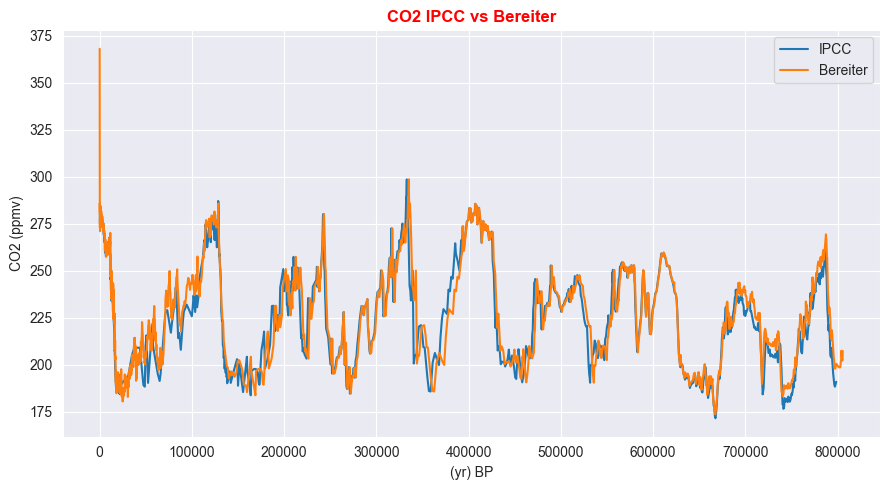

In [521]:
# Set the size of the figure
plt.figure(figsize=(9, 5))

# Create the line plot for IPCC data
sns.lineplot(x='EDC3_gas_a (yr)', y='CO2 (ppmv)', data=ipcc_df_co2, label='IPCC')

# Create the line plot for Bereiter data
sns.lineplot(x='Gasage (yr BP)', y='CO2 (ppmv)', data=ber_df, label='Bereiter')

# Add labels and title
plt.xlabel('(yr) BP')
plt.ylabel('CO2 (ppmv)')
plt.title('CO2 IPCC vs Bereiter', fontweight='bold', color='red')

# Add legend
plt.legend()

# Improve spacing
plt.tight_layout()

# Show the plot
plt.show()



In [ ]:
# plot the CO2 (ppmv) vs EDC3_gas_a (yr)

# Set the size of the figure
plt.figure(figsize=(9, 5))

# Create the line plot
sns.lineplot(x='EDC3_gas_a (yr)', y='CO2 (ppmv)', data=ipcc_df_co2)

# Add labels and title
plt.xlabel('EDC3_gas_a (yr)')
plt.ylabel('CO2 Concentration (ppmv)')
plt.title('CO2 Concentration Over Time', fontweight='bold', color='blue')

# Improve spacing
plt.tight_layout()

# Show the plot
plt.show()